**Census Income Data Set**

**Objective of the project**

The goal of this machine learning project is to predict whether a person makes over 50K a year or not given their demographic variation. 

In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

In [2]:
# Load the data

df = pd.read_csv("adult.csv", skipinitialspace = True)

**EDA**

In [3]:
# Display top 5 rows

df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
# Shape of the dataset

df.shape

(48842, 15)

In [5]:
#To check data types

df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [6]:
#Check null values

df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [7]:
# Checking the info of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
#drop
df.drop(df[df['workclass']=='?'].index, inplace=True)
df.drop(df[df['occupation']=='?'].index, inplace=True)
df.drop(df[df['native-country']=='?'].index, inplace=True)

In [9]:
df.shape

(45222, 15)

In [10]:
#duplicate rows

df[df.duplicated()]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
864,24,Private,194630,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
11189,37,Private,52870,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
11212,29,Private,36440,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
13848,30,Private,180317,Assoc-voc,11,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
15960,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K
18476,39,Private,184659,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
19399,19,Private,130431,5th-6th,3,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,<=50K
19726,41,Private,116391,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
20606,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
21162,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K


In [11]:
# Dropping the diplicate rows

df.drop_duplicates(inplace=True)

In [12]:
df.shape

(45175, 15)

In [13]:
#Checking the stats

df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45175.000000,4.517500e+04,45175.000000,45175.000000,45175.000000,45175.000000
mean,38.556170,1.897388e+05,10.119314,1102.576270,88.687593,40.942512
std,13.215349,1.056524e+05,2.551740,7510.249876,405.156611,12.007730
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173925e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783120e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379030e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


**Random Univariate, Bivariate and Multivariate Analysis**

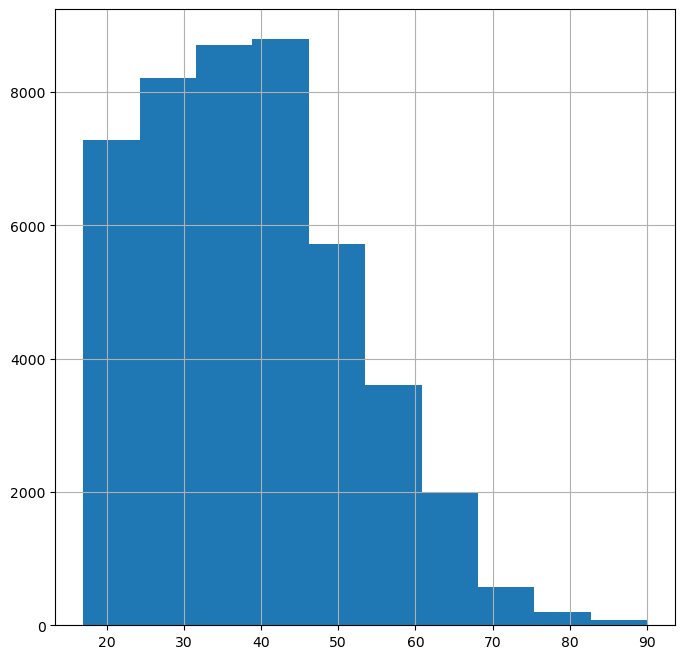

In [14]:
df['age'].hist(figsize=(8,8))
plt.show()

In [15]:
df[df["age"]>70].shape

(635, 15)

**Description about the distribution**

The above histogram shows that :

"age" attribute is not symmetric.
it is right-skewed(But this is totally fine as younger adult earn wages not the older ones)
Minimum and Maximum age of the people is 17 and 90 respectively.
This dataset has fewer observations(868) of people's age after certain age i.e. 70 years.

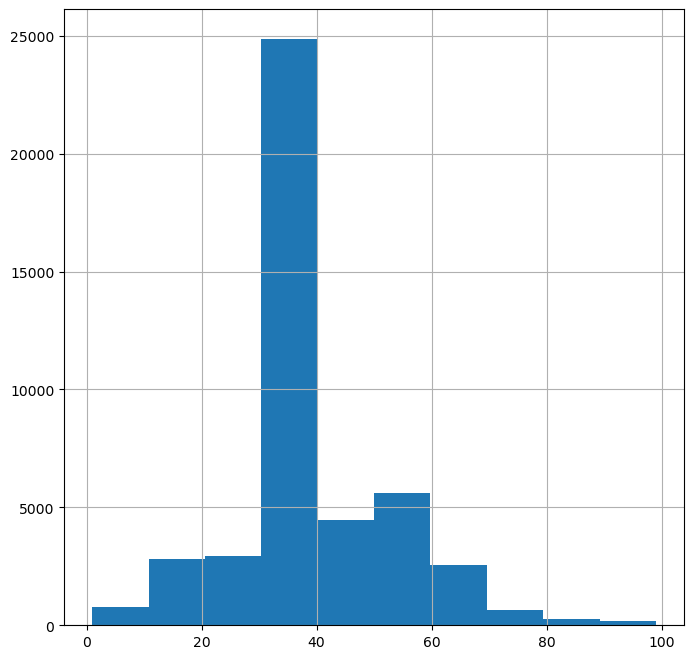

In [16]:
df['hours-per-week'].hist(figsize=(8,8))
plt.show()

**Description about the distribution**

This histogram of "hours-per-week" shows that:

In this data the hours per week atrribute varies within the range of 1 to 99.
Most people work 30-40 hours per week, they are roughly 27,000 people.
There are also few people who works 80-100 hours per week and some less than 20 which is unusual.
75 percentage of the people spend 45 or less working hours per week.

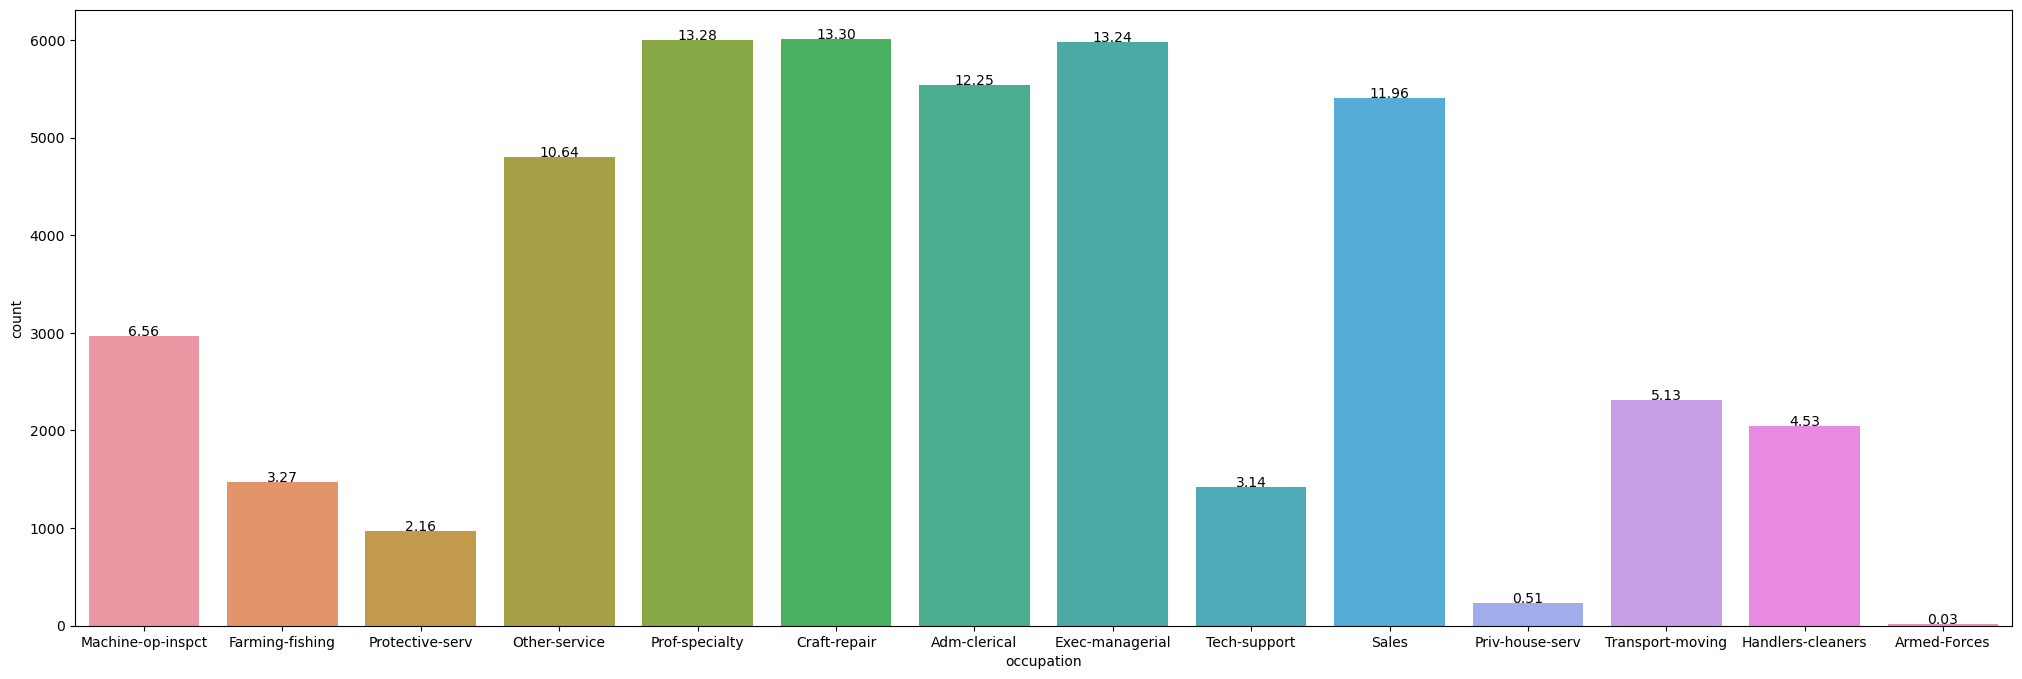

In [17]:
plt.figure(figsize=(25,8))
total = float(len(df) )

ax = sns.countplot(x="occupation", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

**Description about distribution**

There are 14 unique categories present in the occupation attribute.
Prof-specialty has the maximum count(8981) but Craft-repair, Exec-managerial and Adm-clerical Sales has comparable number of observations.
Armed-Forces * has minimum samples in the *occupation** attribute.

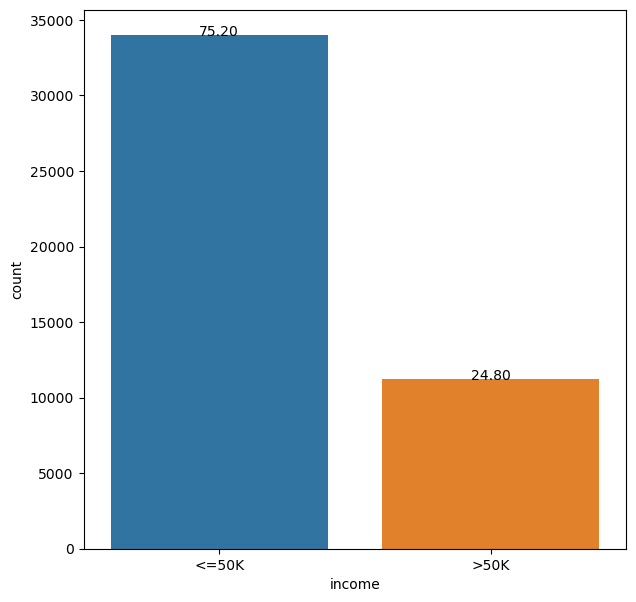

In [18]:
plt.figure(figsize=(7,7))
total = float(len(df) )

ax = sns.countplot(x="income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

**Description about distribution**

This distibution says that:

This dataset not balance , i.e. 23.93%of them are belong to income group 1 (who earns more than 50k) and 76% fall under the income group 0 (who earns less than 50k).

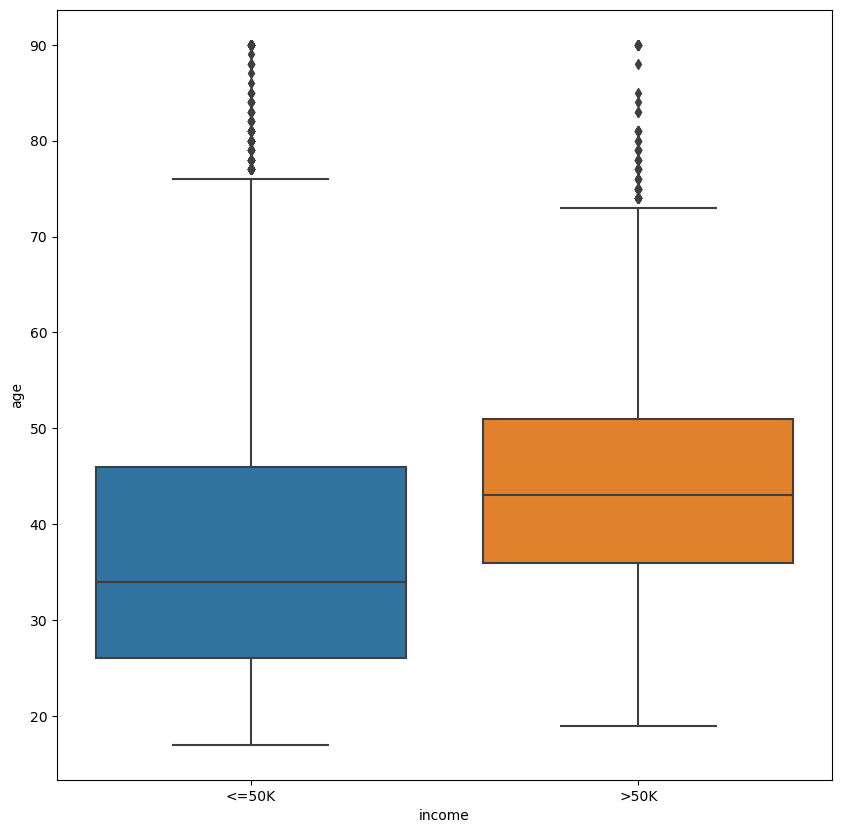

In [19]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="age", data=df)
plt.show()

In [20]:
df[['income', 'age']].groupby(['income'], as_index=False).mean().sort_values(by='age', ascending=False)

,income,age
1,>50K,44.006785
0,<=50K,36.758926


The mean "age" for Income group(<=50k) is 36.8 years.
And for Income group(>50k) is 44.2 years

**Description about boxplot**

The above bivariate boxplot shows :

Outliers present in both the income group(<=50k and >50k) wrt "age" attribute.
Income group(<=50k) has lower median "age"(34 year) than the Income group(>50k) which has median "age"(42 year).
Interquartile range(IQR) :
For Income group(<=50k) , IQR is between [25,46] (long range)
Middle 50% of the Age is spread over longer range for the income group who earn <=50k.

For Income group(>50k) , IQR is between [38,50] (shorter range)

**Hypothesis test (to test the relationship between income & age)**

Two sampled T-test :-The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test.

Example : is there any association between age and income

Determine a null and alternative hypothesis.

In general, the null hypothesis will state that the two populations being tested have no statistically significant difference.
The alternate hypothesis will state that there is one present.
In this example we can say that:

Null Hypothesis :- there is no difference in Mean age of income group >50k and income group <=50k.
Alternate Hypothesis :- there is difference in Mean age of income group >50k and income group <=50k.

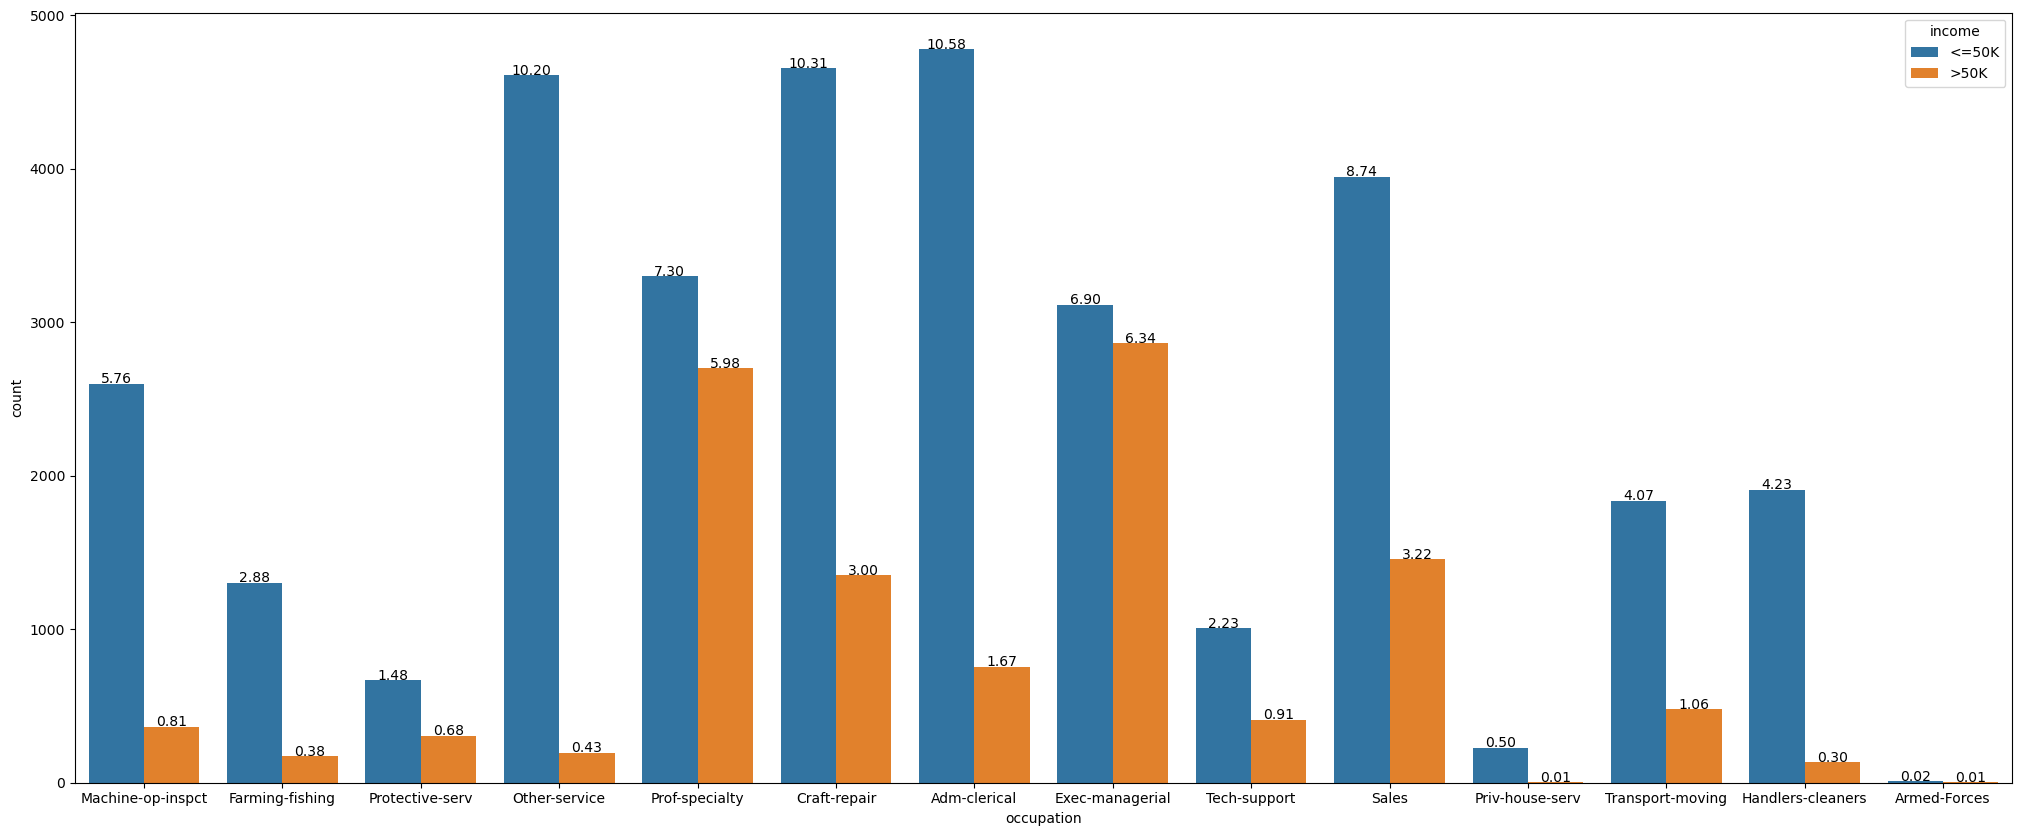

In [21]:
plt.figure(figsize=(25,10))
total = float(len(df) )

ax = sns.countplot(x="occupation", hue="income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

**Description about plot**

This countplot explain following things:

Prof-specialty has maximum percentage that fall in both income group 0 and 1 in whole categories with 12.15% and 6.24% respectively.
There is an interesting thing to look in this plot which is no occupation has greater percentage of falling in income group 1 than the income group 0. i.e. in every occupation, people who earn less than 50k is greater than people who earn >50k.

**Hypothesis test (to test the relationship between income & occupation)**

Here, In this example

H0(Null Hypothesis) : There is no relationship between occupation and income.
H1(Alternate Hypothesis) : There is a relationship between occupation and income.

**Chi-square goodness of fit**

A chi-square goodness of fit test allows us to test whether the observed proportions for a categorical variable differ from hypothesized proportions. The chi-square statistical test is used to determine whether there’s a significant difference between an expected distribution and an actual distribution.

For example, let’s suppose that we believe that the general population consists of 70% private workclass, 10% local-gov, 10% self-emp-not-inc and 10% self-emp-inc. We want to test whether the observed proportions from our sample differ significantly from these hypothesized proportions.

In [22]:
# contingency table
c_t = pd.crosstab(df['occupation'].sample(frac=0.002, replace=True, random_state=1),df['income'].sample(frac=0.002, replace=True, random_state=1),margins = False) 
c_t

income,<=50K,>50K
occupation,,
Adm-clerical,8,1
Craft-repair,9,2
Exec-managerial,10,7
Farming-fishing,2,0
Handlers-cleaners,5,0
Machine-op-inspct,9,1
Other-service,7,0
Priv-house-serv,2,0
Prof-specialty,3,4


In [23]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat, p, dof, expected = chi2_contingency(c_t)
print('dof=%d' % dof)
print(expected)

# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

dof=12
[[ 7.2  1.8]
 [ 8.8  2.2]
 [13.6  3.4]
 [ 1.6  0.4]
 [ 4.   1. ]
 [ 8.   2. ]
 [ 5.6  1.4]
 [ 1.6  0.4]
 [ 5.6  1.4]
 [ 0.8  0.2]
 [ 7.2  1.8]
 [ 4.   1. ]
 [ 4.   1. ]]
probability=0.950, critical=21.026, stat=19.643
Independent (fail to reject H0)


**Final conclusion**

With the help of Chi-Squared test,

As we have accept the H0, that there is no relationship between these two categorical variable.
We can conclude that is no dependency of "workclass" attribute on the target variable "income

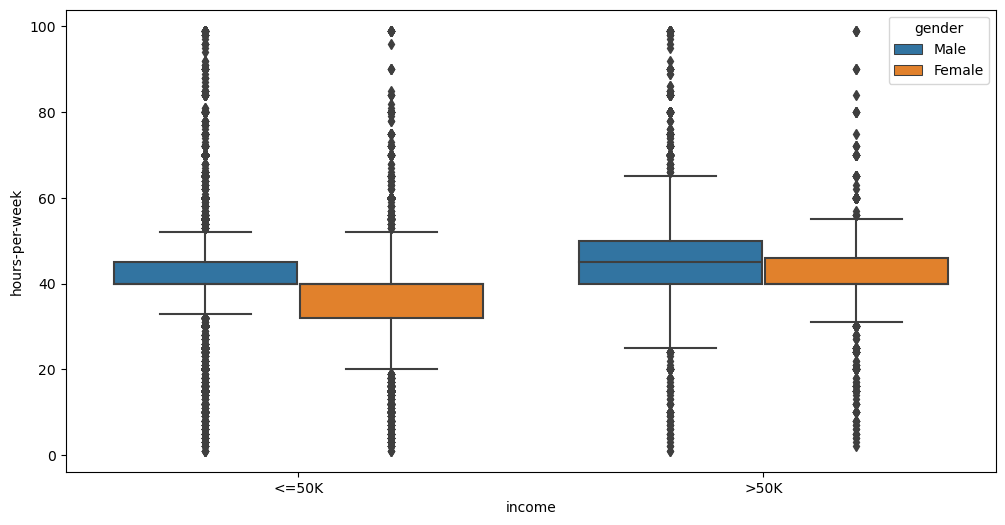

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(x='income',y ='hours-per-week', hue='gender',data=df)
plt.show()

The median "hours-per-week" for females is lower than the males in the Income group who earns <=50k.
Boxplot range for Income group who earns <=50k [minimum (q1-1.5* IQR) and maximum (q3+ 1.5* IQR)] i.e.
Male ~[32,52]
Female ~[17,57]

Interpretation

Females have more flexible working hours per week in the income groups who earns <=50k
Boxplot range for Income group who earns >50k [minimum (q1-1.5* IQR) and maximum (q3+ 1.5* IQR)] i.e.
Male ~[23,63]
Female ~[30,57]

Interpretation

Males have more flexible working hours per week in the income groups who earns <=50k

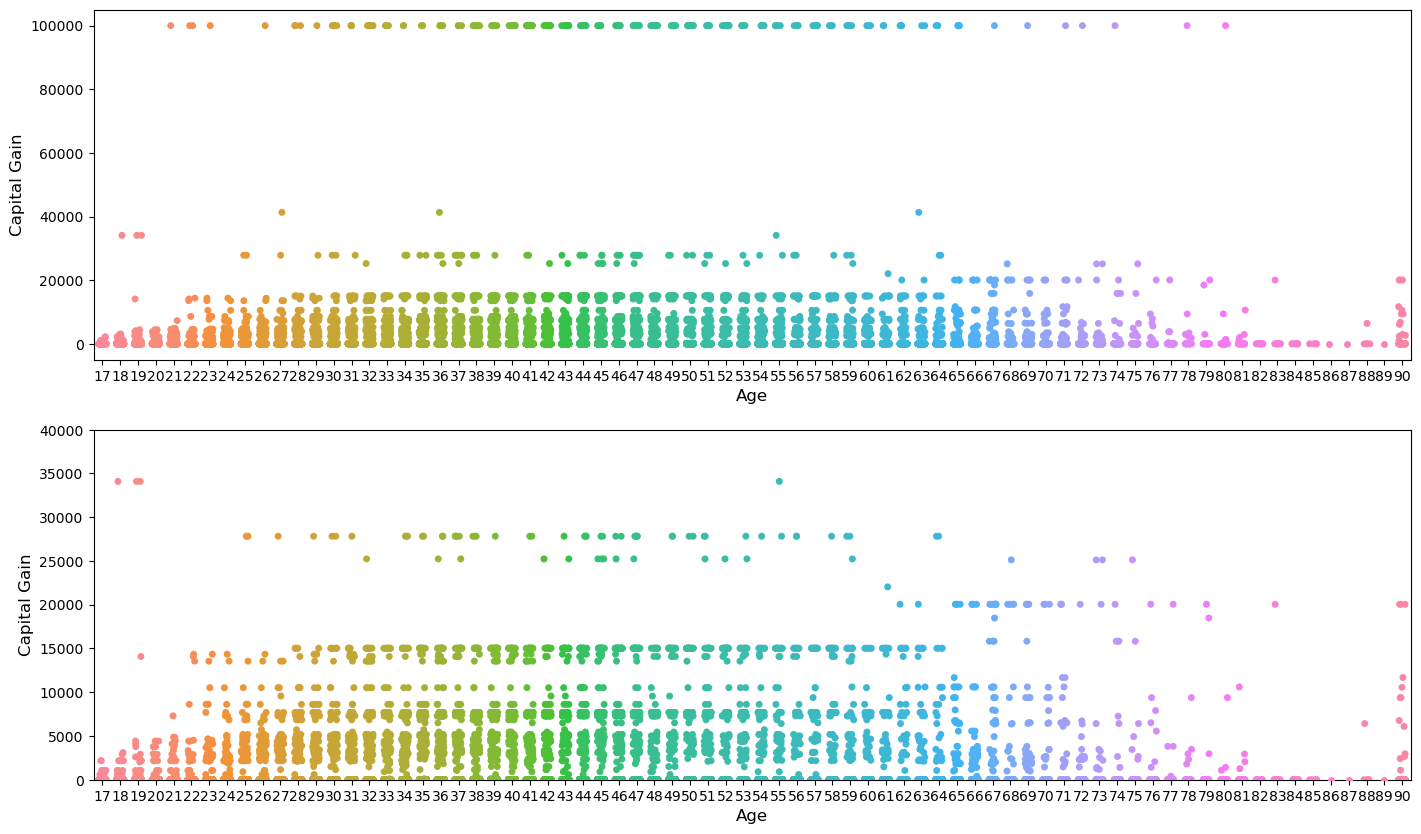

In [25]:
fig = plt.figure(figsize = (17,10))
ax = fig.add_subplot(2,1,1)
sns.stripplot('age', 'capital-gain', data = df,
         jitter = 0.2,ax = ax);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);

ax = fig.add_subplot(2,1,2)
sns.stripplot('age', 'capital-gain', data = df,
         jitter = 0.2);
plt.xlabel('Age',fontsize = 12);
plt.ylabel('Capital Gain',fontsize = 12);
plt.ylim(0,40000);

Between age 28 and 64 capital gain is upto 15000 and after that it decreases and again increments at age 90
Age 90 doesn't follow the pattern.
Capital.gain of 99999 is clearly a outlier .

In [26]:
col_list = df.columns.tolist()

In [27]:
col_list

['age',
 'workclass',
 'fnlwgt',
 'education',
 'educational-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [28]:
col = df.columns

In [29]:
col

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [30]:
#Label Encoding

col_list=[]
for i in df.columns:
    if((df[i].dtype=='object') & (i!="annual_income")):
        col_list.append(i)

In [31]:
col_list

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'native-country',
 'income']

In [32]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder() #create an object

#df['workclass'] = labelencoder.fit_transform(df['workclass'])

for i in col_list:
    df[i] = labelencoder.fit_transform(df[i])

In [33]:
# Multicollinearity and VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list=[] #numerical in nature
for i in df.columns:
    if((df[i].dtype!='object') & (i!="annual_income")):
        col_list.append(i)
        
x = df[col_list]
vif_data = pd.DataFrame()
vif_data['Feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data)

            Feature        VIF
0               age   9.508027
1         workclass   6.262877
2            fnlwgt   4.036286
3         education   9.403156
4   educational-num  20.457726
5    marital-status   4.088940
6        occupation   3.210335
7      relationship   2.649680
8              race  18.533565
9            gender   4.590274
10     capital-gain   1.083917
11     capital-loss   1.079459
12   hours-per-week  13.004894
13   native-country  28.955170
14           income   1.762055


In [34]:
df = df.drop(["native-country"],axis=1)

In [35]:
# Multicollinearity and VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list=[] #numerical in nature
for i in df.columns:
    if((df[i].dtype!='object') & (i!="annual_income")):
        col_list.append(i)
        
x = df[col_list]
vif_data = pd.DataFrame()
vif_data['Feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data)

            Feature        VIF
0               age   9.001978
1         workclass   6.225720
2            fnlwgt   4.013810
3         education   9.265065
4   educational-num  19.316871
5    marital-status   3.985411
6        occupation   3.199411
7      relationship   2.536942
8              race  16.061925
9            gender   4.509520
10     capital-gain   1.083121
11     capital-loss   1.079327
12   hours-per-week  12.608183
13           income   1.747187


In [36]:
df = df.drop(["educational-num"],axis=1)

In [37]:
# Multicollinearity and VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list=[] #numerical in nature
for i in df.columns:
    if((df[i].dtype!='object') & (i!="annual_income")):
        col_list.append(i)
        
x = df[col_list]
vif_data = pd.DataFrame()
vif_data['Feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data)

           Feature        VIF
0              age   8.868189
1        workclass   6.162776
2           fnlwgt   4.000815
3        education   7.580423
4   marital-status   3.910511
5       occupation   3.124450
6     relationship   2.511659
7             race  15.339485
8           gender   4.509510
9     capital-gain   1.081285
10    capital-loss   1.078147
11  hours-per-week  11.986203
12          income   1.638608


In [38]:
df = df.drop(["race"],axis=1)

In [39]:
# Multicollinearity and VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list=[] #numerical in nature
for i in df.columns:
    if((df[i].dtype!='object') & (i!="annual_income")):
        col_list.append(i)
        
x = df[col_list]
vif_data = pd.DataFrame()
vif_data['Feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data)

           Feature        VIF
0              age   8.167782
1        workclass   5.988214
2           fnlwgt   3.940400
3        education   7.250340
4   marital-status   3.790524
5       occupation   3.093838
6     relationship   2.437117
7           gender   4.360997
8     capital-gain   1.080649
9     capital-loss   1.078124
10  hours-per-week  11.134102
11          income   1.638596


In [40]:
df  =df.drop(["hours-per-week"],axis=1)

In [41]:
# Multicollinearity and VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list=[] #numerical in nature
for i in df.columns:
    if((df[i].dtype!='object') & (i!="annual_income")):
        col_list.append(i)
        
x = df[col_list]
vif_data = pd.DataFrame()
vif_data['Feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data)

           Feature       VIF
0              age  7.361742
1        workclass  5.810150
2           fnlwgt  3.867262
3        education  6.706506
4   marital-status  3.763900
5       occupation  3.057752
6     relationship  2.410030
7           gender  4.018354
8     capital-gain  1.080299
9     capital-loss  1.077754
10          income  1.617748


In [42]:
df  =df.drop(["age"],axis=1)

In [43]:
# Multicollinearity and VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

col_list=[] #numerical in nature
for i in df.columns:
    if((df[i].dtype!='object') & (i!="annual_income")):
        col_list.append(i)
        
x = df[col_list]
vif_data = pd.DataFrame()
vif_data['Feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data)

          Feature       VIF
0       workclass  5.206354
1          fnlwgt  3.782773
2       education  6.046162
3  marital-status  3.763006
4      occupation  2.992945
5    relationship  2.398761
6          gender  3.890552
7    capital-gain  1.080061
8    capital-loss  1.076660
9          income  1.560373


In [44]:
x

,workclass,fnlwgt,education,marital-status,occupation,relationship,gender,capital-gain,capital-loss,income
0,2,226802,1,4,6,3,1,0,0,0
1,2,89814,11,2,4,0,1,0,0,0
2,1,336951,7,2,10,0,1,0,0,1
3,2,160323,15,2,6,0,1,7688,0,1
5,2,198693,0,4,7,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
48837,2,257302,7,2,12,5,0,0,0,0
48838,2,154374,11,2,6,0,1,0,0,1
48839,2,151910,11,6,0,4,0,0,0,0
48840,2,201490,11,4,0,3,1,0,0,0


In [45]:
y=df["income"]

In [46]:
# Running diferent models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [47]:
array = df.values
x = array[:,0:8]
y = array[:,8]
print('Split Data: x')
print(x)
print('Split Data: y')
print(y)
validation_size = 0.20
seed = 7
num_folds = 10
scoring = 'accuracy'
x_train, x_validation, y_train, y_validation = train_test_split(x,y, test_size=validation_size)
# Params for Random Forest
num_trees = 100
max_features = 3

#Spot Check 4 Algorithms (LR, KNN, CART, GNB, RFC)
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features, random_state=seed)))

# evalutate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Split Data: x
[[     2 226802      1 ...      3      1      0]
 [     2  89814     11 ...      0      1      0]
 [     1 336951      7 ...      0      1      0]
 ...
 [     2 151910     11 ...      4      0      0]
 [     2 201490     11 ...      3      1      0]
 [     3 287927     11 ...      5      0  15024]]
Split Data: y
[0 0 0 ... 0 0 0]
LR: 0.952435 (0.002072)
KNN: 0.952407 (0.002071)
CART: 0.906558 (0.004249)
NB: 0.090509 (0.005999)
RF: 0.933343 (0.002423)


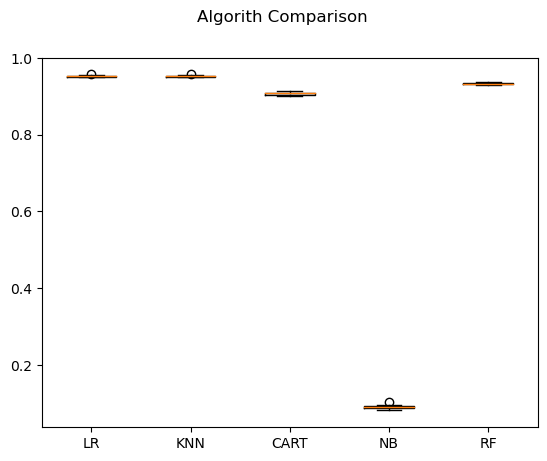

In [48]:
fig = plt.figure()
fig.suptitle('Algorith Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [49]:
#Final Run

random_forest = RandomForestClassifier(n_estimators=250,max_features=5)
random_forest.fit(x_train, y_train)
predictions = random_forest.predict(x_validation)
print("Accuracy: %s%%" % (100*accuracy_score(y_validation, predictions)))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

Accuracy: 93.84615384615384%
[[8475    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]
 [   2    0    0 ...    0    0    0]
 ...
 [   2    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]
 [   1    0    0 ...    0    0    0]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      8614
         155       0.00      0.00      0.00         1
         213       0.00      0.00      0.00         2
         323       0.00      0.00      0.00         2
         625       0.00      0.00      0.00         4
         653       0.00      0.00      0.00         1
         880       0.00      0.00      0.00         2
        1092       0.00      0.00      0.00         2
        1138       0.00      0.00      0.00         2
        1258       0.00      0.00      0.00         2
        1340       0.00      0.00      0.00         2
        1380       0.00      0.00      0.00         4
        1408       0.00      0.00      0